# Previsão de Eleição de Deputados

Neste notebook vamos usar classificadores para prever se candidatos ao cargo de Deputado Federal serão eleitos.
Para isso, usaremos os seguintes dados:

## 1. Dados

Os dados utilizados correspondem aos das eleições de Deputado Federal nos anos de 2006, 2010 e 2014. Estão dividos nas seguintes colunas:

* **ano:** Ano da eleição;
* **sequencial_candidato:** O identificador do candidato. Corresponde à coluna Id do arquivo de submissão;
* **nome:** Nome do candidato;
* **uf:**  Sigla do estado do candidato;
* **partido:** Partido do candidato;
* **quantidade_doacoes:** Número de doações que um candidato recebeu;
* **quantidade_doadores:** Número de doadores que um candidato teve;
* **total_receita:** Total de receita de um candidato;
* **media_receita:** Média da receita de um candidato;
* **recursos_de_outros_candidatos.comites:** Total de receita proveniente de outros candidatos e comitês;
* **recursos_de_pessoas_fisicas:** Total de receita proveniente de pessoas físicas;
* **recursos_de_pessoas_juridicas:** Total de receita proveniente de pessoas juridicas;
* **recursos_proprios:** Total de receita proveniente dos próprios candidatos;
* **recursos_de_partido_politico:** Total de receita proveniente do partido do candidato;
* **quantidade_despesas:** Número de despesas que um candidato teve;
* **quantidade_fornecedores:** Número de fornecedores que um candidato teve;
* **total_despesa:** Total de depesa de um candidato;
* **media_despesa:** Média da despesa de um candidato;
* **cargo:** Cargo ao qual o candidato está concorrendo;
* **sexo:** Sexo do candidato;
* **grau:** Grau de escolaridade do candidato;
* **estado_civil:** Estado civil do candidato;
* **ocupacao:** Ocupação do candidato;
* **situacao:** Situação final do candidato. Corresponde à coluna Predict do arquivo de submissão;

Esses dados estão divididos em:

* **train.csv:** Este é o conjunto de treino que será utilizado para treinar o modelo. Para o treino serão utilizados os dados das eleições dos anos de 2006 e 2010;
* **unlabeled.csv:** Este é o conjunto, composto por uma parte dos dados de 2014, que será usado na previsão. 

## 2. Bibliotecas

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Python imbalanced-learn module
from imblearn.combine import SMOTETomek




## 3. Lendo os dados

In [2]:
labeled = pd.read_csv("data/train.csv")


df_labeled = pd.DataFrame(labeled) # load the dataset as a pandas data frame
df_labeled.head(5)
#print("#Rows and #columns", df_labeled.shape)
#df_labeled.columns


,ano,sequencial_candidato,nome,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos.comites,...,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,cargo,sexo,grau,estado_civil,ocupacao,situacao
0,2006,10001,JOSÉ LUIZ NOGUEIRA DE SOUSA,AP,PT,6,6,16600.00,2766.67,0.0,...,14,14,16583.60,1184.54,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),VEREADOR,nao_eleito
1,2006,10002,LOIVA DE OLIVEIRA,RO,PT,13,13,22826.00,1755.85,6625.0,...,24,23,20325.99,846.92,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),SERVIDOR PÚBLICO ESTADUAL,nao_eleito
2,2006,10002,MARIA DALVA DE SOUZA FIGUEIREDO,AP,PT,17,16,158120.80,9301.22,2250.0,...,123,108,146011.70,1187.09,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,VIÚVO(A),PEDAGOGO,eleito
3,2006,10002,ROMALDO MILANI,MS,PRONA,6,6,3001.12,500.19,0.0,...,8,8,3001.12,375.14,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO INCOMPLETO,CASADO(A),MILITAR REFORMADO,nao_eleito
4,2006,10003,ANSELMO DE JESUS ABREU,RO,PT,48,48,119820.00,2496.25,0.0,...,133,120,116416.64,875.31,DEPUTADO FEDERAL,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),DEPUTADO,eleito


In [3]:
unlabeled = pd.read_csv("data/unlabeled.csv")

df_unlabeled = pd.DataFrame(unlabeled) # load the dataset as a pandas data frame

df_unlabeled.head(5)
#print("#Rows and #columns", df_unlabeled.shape)
#df_unlabeled.columns

,ano,sequencial_candidato,nome,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos.comites,...,recursos_de_partido_politico,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,cargo,sexo,grau,estado_civil,ocupacao
0,2014,10000000135,EMERSON DA SILVA SANTOS,AC,PSOL,3,3,1580.00,526.67,0.00,...,80.0,3,3,1580.00,526.67,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),"CORRETOR DE IMÓVEIS, SEGUROS, TÍTULOS E VALORES"
1,2014,10000000142,GERALDO SILVA DOS SANTOS,AC,PSOL,5,5,3180.00,636.00,0.00,...,80.0,6,5,3130.02,521.67,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),VIGILANTE
2,2014,10000000158,CARLOS CESAR CORREIA DE MESSIAS,AC,PSB,40,38,336793.13,8419.83,1923.07,...,0.0,145,139,326869.78,2254.27,DEPUTADO FEDERAL,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,CASADO(A),OUTROS
3,2014,10000000161,IDESIO LUIS FRANKE,AC,PT,29,29,156719.32,5404.11,39122.32,...,25000.0,136,121,241016.07,1772.18,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),AGRÔNOMO
4,2014,10000000163,LEONARDO CUNHA DE BRITO,AC,PT,160,146,737073.00,4606.71,10000.00,...,25000.0,518,354,567401.15,1095.37,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),ADVOGADO


## 4. Pré processamento

### 4.1 Valores Nulos

In [4]:
df_labeled.isnull().any()

ano                                      False
sequencial_candidato                     False
nome                                     False
uf                                       False
partido                                  False
quantidade_doacoes                       False
quantidade_doadores                      False
total_receita                            False
media_receita                            False
recursos_de_outros_candidatos.comites    False
recursos_de_pessoas_fisicas              False
recursos_de_pessoas_juridicas            False
recursos_proprios                        False
recursos_de_partido_politico             False
quantidade_despesas                      False
quantidade_fornecedores                  False
total_despesa                            False
media_despesa                            False
cargo                                    False
sexo                                     False
grau                                     False
estado_civil 

### 4.2 Tratando variáveis categóricas e eliminando algumas features 

In [5]:
all_data = pd.concat((df_labeled,df_unlabeled), sort=False)

all_data = all_data.drop(columns=['nome', 'media_receita', 'media_despesa', 'cargo'])

all_data['situacao'] = all_data['situacao'].map({'eleito': 1, 'nao_eleito': 0})

# tranform categorical variables
all_data = pd.get_dummies(all_data)

df_labeled = all_data.loc[all_data['ano'] != 2014]

df_unlabeled = all_data.loc[all_data['ano'] == 2014].drop("situacao", 1)

train = df_labeled.drop("situacao", 1)



### 4.3 Separando os dados em treino e Validação

In [6]:
# Split dataset into training set and test set
X_train, X_validation, Y_train, Y_validation = train_test_split(train, df_labeled["situacao"], test_size=0.3) # 70% training and 30% test

print("df_labeled", df_labeled.shape)
print("all_data:" , all_data.shape)
print("X_train: ", X_train.shape)
print("X_validation", X_validation.shape)
print("Y_train", Y_train.shape)
print("Y_validation", Y_validation.shape)
print("Unlabeled data: ", df_unlabeled.shape)

df_labeled (7622, 262)
all_data: (12214, 262)
X_train:  (5335, 261)
X_validation (2287, 261)
Y_train (5335,)
Y_validation (2287,)
Unlabeled data:  (4592, 261)


### 4.4 Balanceamento das classes

In [7]:
def plot_groups(df):
    ax = df['situacao'].value_counts().plot(kind='bar',
                                              figsize=(10,7),
                                              color=["indigo", "purple"], )

    ax.set_alpha(0.8)
    ax.set_title("Proporção das classes", fontsize=18)
    ax.set_xlabel("Número de ocorrências no dataset", fontsize=10);
    ax.set_xticklabels(["eleito", "nao_eleito"])

    # create a list to collect the plt.patches data
    totals = []

    # find the values and append to list
    for i in ax.patches:
        totals.append(i.get_height())

    # set individual bar lables using above list
    total = sum(totals)

    # set individual bar lables using above list
    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()+.1, i.get_height()-500, \
                str(round((i.get_height()/total)*100, 2))+'%', fontsize=20,
                    color='white')
        ax.text(i.get_x()+.07, i.get_height()-999, \
                "Total: " + str(i.get_height()), fontsize=18,
                    color='white')

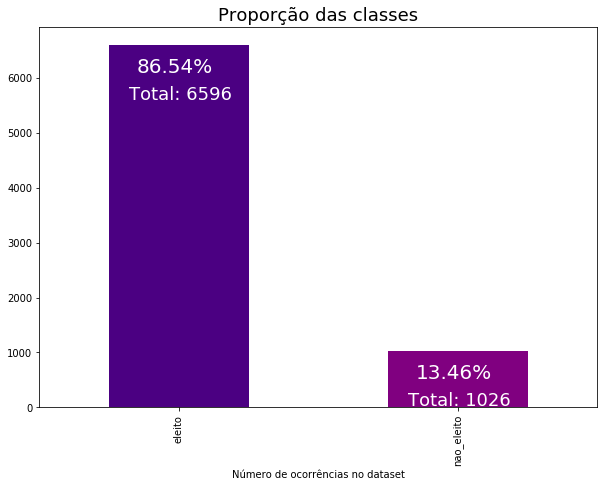

In [8]:
plot_groups(df_labeled)

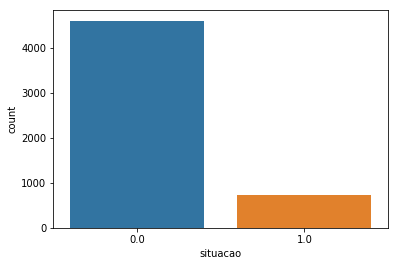

In [9]:
sns.countplot(Y_train)


Como observado nos gráficos acima, as classes estão desbalanceadas. Esse desbalanceamento pode tendenciar o classificador a classificar os dados como pertencentes à classe majoritária. Segundo Emerson L. M e Marcelo L. (MACHADO, Emerson Lopes. Um estudo de limpeza em base de dados desbalanceada e com sobreposiçao de classes. 2007.), classificadores gerados a partir de bases de treinamento desbalanceadas apresentam altas taxas de falsos negativos para as classes minoritárias. 

Existem basicamente duas formas de tratar o desbalanceamento de classes: 
* Atribuir custos diferenciados às classes durante a indução do modelo de classificação;
*  Reamostragem de dados (subamostragem ou sobreamostragem): Na **subamostragem**, dados da classe majoritária são removidos (desvantagem: se realizada de forma aleatória pode desprezar dados úteis), enquanto na **sobreamostragem**, dados da classe minoritária são replicados ou são gerados dados sintéticos (desvantagem:  a replicação dos exemplos tende a aumentar o custo computacional do processo).

###  4.5 Reamostragem dos dados de treino

Vamos resolver o problema de desbalanceamento com a técnica da subamostragem. 

Nesse caso, vamos usar a técnica SMOTETomek para fazer uma combinação de sobreamostragem e subamostragem.

In [10]:
smt = SMOTETomek(ratio='auto')
X_smt, Y_smt = smt.fit_sample(X_train, Y_train)


X unbalanced:  (5335, 261)
Y unbalanced: (5335,)
X balanced:  (9100, 261)
Y balanced: (9100,)


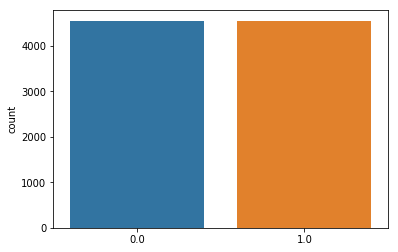

In [11]:
Y_train_plot = Y_smt[:,np.newaxis]
sns.countplot(Y_train_plot[:,0])

print("X unbalanced: ", X_train.shape)
print("Y unbalanced:", Y_train.shape)
print("X balanced: ", X_smt.shape)
print("Y balanced:", Y_smt.shape)

Agora que as classes dos dados de treino estão balanceadas, vamos aos modelos.

## 5. Modelos

In [12]:
## function to get cross validation f1 score
def f1_cv(model):
    f1 = cross_val_score(model, X_smt, Y_smt, scoring='f1', cv=10)
    return(f1)

In [13]:
## function to get Precision, Recall and AUC-Precision&Recall 
def print_metrics_validation(model):
    
    print("Accuracy: ", model.score(X_validation, Y_validation))    
    Y_predict = model.predict(X_validation)    
    print("Precision: ", precision_score(Y_validation, Y_predict))
    print("Recall: ", recall_score(Y_validation, Y_predict))
    print("AUC: ", roc_auc_score(Y_validation, Y_predict))    
   
    
    

### 5.1 Regressão Logística

In [14]:
c_list = np.arange(0.5, 3.0, 0.5).tolist()
cv_log_reg= [f1_cv(LogisticRegression(C = c, random_state=0)).mean() 
            for c in c_list]
cv_log_reg = pd.Series(cv_log_reg, index = c_list)

/home/andreza/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andreza/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andreza/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andreza/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andreza/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

/home/andreza/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andreza/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andreza/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andreza/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/andreza/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

Best C:  0.5
Best F1-score:  0.732250224999728


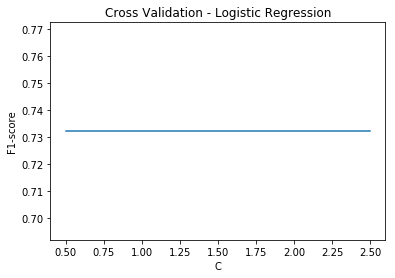

In [15]:
cv_log_reg.plot(title = "Cross Validation - Logistic Regression")
plt.xlabel("C")
plt.ylabel("F1-score")

best_c_reg_log = cv_log_reg.idxmax()
print("Best C: ", best_c_reg_log)
best_f1_reg_log = cv_log_reg.max()
print("Best F1-score: ", best_f1_reg_log)

#### 5.1.1 Melhor parâmetro:  Regressão Logística

In [16]:
best_reg_log = LogisticRegression(C = best_c_reg_log, random_state=0)
best_reg_log.fit(X_smt, Y_smt)

print_metrics_validation(best_reg_log)

prediction_log_reg = best_reg_log.predict(df_unlabeled)

Accuracy:  0.5509400961958898
Precision:  0.20483870967741935
Recall:  0.8610169491525423
AUC:  0.6830185147369139


/home/andreza/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 5.2 KNN


In [17]:
neighbors = np.arange(1,16,2).tolist()

cv_knn = [f1_cv(KNeighborsClassifier(n_neighbors=neighbor)).mean() 
            for neighbor in neighbors]
cv_knn = pd.Series(cv_knn, index = neighbors)


Best number of neighbors:  1
Best F1:  0.9596885215838326


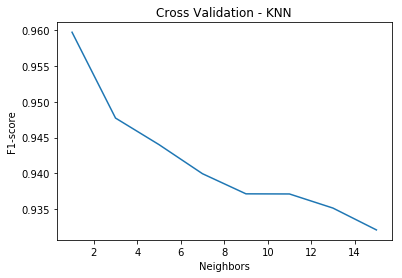

In [18]:
cv_knn.plot(title = "Cross Validation - KNN")
plt.xlabel("Neighbors")
plt.ylabel("F1-score")

best_neighbor = cv_knn.idxmax()

print("Best number of neighbors: ", best_neighbor)
best_f1_knn = cv_knn.max()
print("Best F1: ", best_f1_knn)

#### 5.2.1 Melhor parâmetro: KNN

In [19]:
best_knn = KNeighborsClassifier(n_neighbors=best_neighbor)
best_knn.fit(X_smt, Y_smt)

print_metrics_validation(best_knn)

prediction_knn = best_knn.predict(df_unlabeled)

Accuracy:  0.8841276781810232
Precision:  0.538659793814433
Recall:  0.7084745762711865
AUC:  0.8093075692600912


### 5.3 Árvore de Decisão

In [78]:
depths = np.arange(150,200,10).tolist()

cv_dtc= [f1_cv(DecisionTreeClassifier(max_depth=depth)).mean() 
            for depth in depths]
cv_dtc = pd.Series(cv_dtc, index = depths)

Best depth:  150
Best F1:  0.9382495155974997


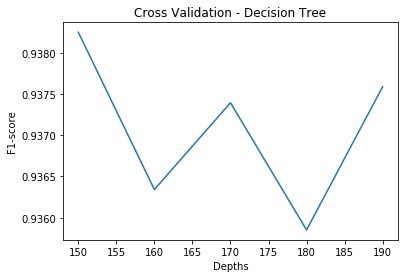

In [79]:
cv_dtc.plot(title = "Cross Validation - Decision Tree")
plt.xlabel("Depths")
plt.ylabel("F1-score")

best_depth_dtc = cv_dtc.idxmax()
    
print("Best depth: ", best_depth_dtc)
best_f1_dtc = cv_dtc.max()
print("Best F1: ", best_f1_dtc)

#### 5.3.1 Melhor parâmetro:  Árvore de Decisão

In [80]:
best_dtc = DecisionTreeClassifier(max_depth=best_depth_dtc)
best_dtc.fit(X_smt, Y_smt)

print_metrics_validation(best_dtc)

prediction_dtc = best_dtc.predict(df_unlabeled)

Accuracy:  0.8911237428946218
Precision:  0.5701219512195121
Recall:  0.6338983050847458
AUC:  0.7815575862773126



### 5.4 Adaboost

In [53]:
#learning_rates = np.arange(0.01,2,0.1).tolist()

#cv_abdt= [f1_cv(AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), 
#                                   algorithm="SAMME.R", random_state=0,
 #                                 learning_rate=learning_rate)).mean() 
  #          for learning_rate in learning_rates]
#cv_abdt = pd.Series(cv_abdt, index = learning_rates)

In [54]:
#cv_abdt.plot(title = "Cross Validation - Adaboot Decision Tree")
#plt.xlabel("learning rates")
#plt.ylabel("F1-score")

#best_lr_abdt = cv_abdt.idxmax()

#print("Best learning rate: ", best_lr_abdt)
#best_f1_abdt = cv_abdt.max()
#print("Best F1: ", best_f1_abdt)

In [81]:
estimators=np.arange(50,300,50).tolist()

Best estimator:  200
Best F1:  0.9498151205803133


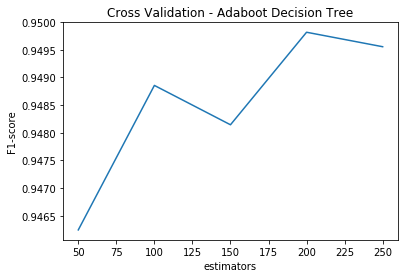

In [82]:
cv_abdt= [f1_cv(AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), 
                                   algorithm="SAMME.R", random_state=0,
                                  n_estimators=estimator)).mean() 
            for estimator in estimators]
cv_abdt = pd.Series(cv_abdt, index = estimators)

cv_abdt.plot(title = "Cross Validation - Adaboot Decision Tree")
plt.xlabel("estimators")
plt.ylabel("F1-score")

best_estimator_abdt = cv_abdt.idxmax()

print("Best estimator: ", best_estimator_abdt)
best_f1_abdt = cv_abdt.max()
print("Best F1: ", best_f1_abdt)

#### 5.4.1 Melhor parâmetro: Adaboost

In [83]:
#best_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), 
#                                   algorithm="SAMME.R", random_state=0,
#                                  learning_rate=best_lr_abdt)
#best_ada.fit(X_smt, Y_smt)

#print_metrics_validation(best_ada)

#predictions_ada = best_ada.predict(df_unlabeled)

In [ ]:
best_ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), 
                                   algorithm="SAMME.R", random_state=0,
                                  n_estimators=best_estimator_abdt)
best_ada.fit(X_smt, Y_smt)

print_metrics_validation(best_ada)

predictions_ada = best_ada.predict(df_unlabeled)

### 5.5 Random Forest

Best estimator:  210
Best F1:  0.9587294605264166


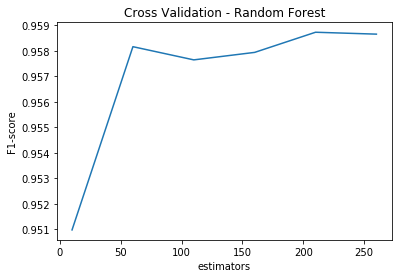

In [70]:
estimators=np.arange(10,300,50).tolist() 

cv_rf= [f1_cv(RandomForestClassifier(n_estimators=estimator)).mean() 
            for estimator in estimators]
cv_rf = pd.Series(cv_rf, index = estimators)

cv_rf.plot(title = "Cross Validation - Random Forest")
plt.xlabel("estimators")
plt.ylabel("F1-score")

best_estimator_rf = cv_rf.idxmax()

print("Best estimator: ", best_estimator_rf)
best_f1_rf = cv_rf.max()
print("Best F1: ", best_f1_rf)

#### 5.5.1 Melhor parâmetro: Random Forest

In [71]:
best_rf = RandomForestClassifier(n_estimators=best_estimator_rf)

best_rf.fit(X_smt, Y_smt)

print_metrics_validation(best_rf)

predictions_rf = best_rf.predict(df_unlabeled)

Accuracy:  0.9086139046786182
Precision:  0.6091370558375635
Recall:  0.8135593220338984
AUC:  0.8681250425430537


Links úteis:

* [BAR CHART ANNOTATIONS WITH PANDAS AND MATPLOTLIB](http://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html)

* [Um Estudo de Limpeza em Base de Dados Desbalanceada
com Sobreposição de Classes](https://www.cos.ufrj.br/~ines/enia07_html/pdf/28076.pdf)
* [Pré-processamento de dados](https://edisciplinas.usp.br/pluginfile.php/4052836/mod_resource/content/4/mineracaodadosbiologicos-parte3.pdf)
* [KNN Classification using Scikit-learn](https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn)
* [A Complete Guide to K-Nearest-Neighbors with Applications in Python and R](https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/)
* [Resampling strategies for imbalanced datasets](https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets)